In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download("punkt")
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("./labeled.csv")

In [3]:
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [4]:
df.shape

(14412, 2)

In [5]:
df["toxic"] = df["toxic"].apply(int)

In [6]:
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


<AxesSubplot:xlabel='toxic', ylabel='count'>

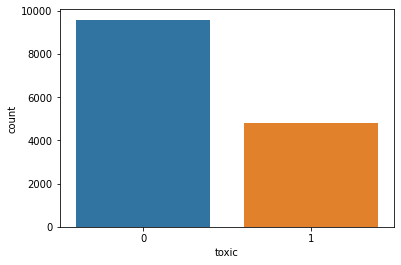

In [7]:
sns.countplot(data=df, x="toxic")

In [8]:
for c in df[df["toxic"] == 1]["comment"].head(5):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [9]:
for c in df[df["toxic"] == 0]["comment"].head(5):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [10]:
train_df, test_df = train_test_split(df, test_size=500)

In [11]:
test_df.shape

(500, 2)

<AxesSubplot:xlabel='toxic', ylabel='count'>

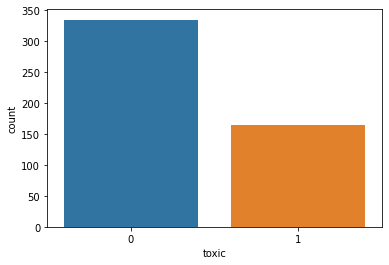

In [12]:
sns.countplot(data=test_df, x="toxic")

<AxesSubplot:xlabel='toxic', ylabel='count'>

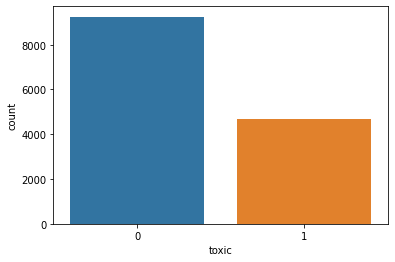

In [13]:
sns.countplot(data=train_df, x="toxic")

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
sentence_example = df.iloc[1]["comment"]
tokens = word_tokenize(sentence_example, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [16]:
tokens

['Хохлы',
 ',',
 'это',
 'отдушина',
 'затюканого',
 'россиянина',
 ',',
 'мол',
 ',',
 'вон',
 ',',
 'а',
 'у',
 'хохлов',
 'еще',
 'хуже',
 '.',
 'Если',
 'бы',
 'хохлов',
 'не',
 'было',
 ',',
 'кисель',
 'их',
 'бы',
 'придумал',
 '.']

In [18]:
tokens_without_punctuation

['Хохлы',
 'это',
 'отдушина',
 'затюканого',
 'россиянина',
 'мол',
 'вон',
 'а',
 'у',
 'хохлов',
 'еще',
 'хуже',
 'Если',
 'бы',
 'хохлов',
 'не',
 'было',
 'кисель',
 'их',
 'бы',
 'придумал']

In [19]:
tokens_without_stop_words_and_punctuation

['Хохлы',
 'это',
 'отдушина',
 'затюканого',
 'россиянина',
 'мол',
 'вон',
 'хохлов',
 'хуже',
 'Если',
 'хохлов',
 'кисель',
 'придумал']

In [20]:
stemmed_tokens

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [22]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence)
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [24]:
tokenize_sentence(df.iloc[1]["comment"])

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [25]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [26]:
features = vectorizer.fit_transform(train_df["comment"])

In [32]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df["toxic"])

LogisticRegression(random_state=0)

In [33]:
model.predict(features[0])[0]

0

In [34]:
train_df.iloc[0]["comment"]

'Хотя, пардон, на 2м установке браться лучше таки на разжим за D36,4 - D50 со ступенчатой проточкой кулачков. Жесткость детали будет выше. Главное, чтобы патрон был не убитый, и давление минимальное, в районе 10 bar. Сам на 310-м работаю\n'

In [35]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
])

In [38]:
model_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x00000202A47B0E50>)),
                ('model', LogisticRegression(random_state=0))])

In [41]:
model_pipeline.predict(["У меня все хорошо"])

array([0], dtype=int64)

In [43]:
model_pipeline.predict(["Хохлы"])

array([1], dtype=int64)

In [45]:
precision_score(test_df["toxic"], model_pipeline.predict(test_df["comment"]))

0.9385964912280702

In [46]:
recall_score(test_df["toxic"], model_pipeline.predict(test_df["comment"]))

0.6484848484848484

In [48]:
prec, rec, thresholds = precision_recall_curve(test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, -1])

In [51]:
from sklearn.metrics import plot_precision_recall_curve

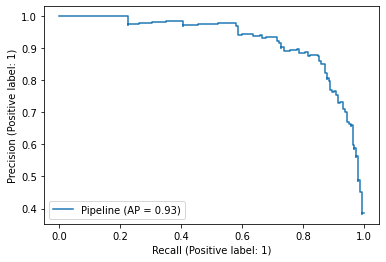

In [55]:
plot_precision_recall_curve(estimator = model_pipeline, X = test_df["comment"], y = test_df["toxic"])

In [56]:
np.where(prec > 0.95)

(array([327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
        340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
        353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
        366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,
        379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391,
        392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
        405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
        418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428], dtype=int64),)

In [57]:
thresholds[327]

0.5483881006359193

In [60]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[327])

0.9603960396039604

In [61]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[327])

0.5878787878787879

In [62]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", GridSearchCV(LogisticRegression(random_state=0), param_grid={"C": [0.1, 1, 10]}, cv=3, verbose=4))
])

In [63]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.686 total time=   0.2s
[CV 2/3] END .............................C=0.1;, score=0.684 total time=   0.1s
[CV 3/3] END .............................C=0.1;, score=0.687 total time=   0.2s
[CV 1/3] END ...............................C=1;, score=0.841 total time=   0.4s
[CV 2/3] END ...............................C=1;, score=0.834 total time=   0.2s
[CV 3/3] END ...............................C=1;, score=0.839 total time=   0.4s


c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..............................C=10;, score=0.864 total time=   0.7s


c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..............................C=10;, score=0.870 total time=   0.7s


c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ..............................C=10;, score=0.863 total time=   0.8s


c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x00000202A480FA60>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10]}, verbose=4))])

In [64]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10.))
])

In [65]:
model_pipeline_c_10.fit(train_df["comment"], train_df["toxic"])

c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x00000202A480F310>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [66]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(test_df["toxic"], probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, -1])

In [68]:
np.where(prec_c_10 > 0.95)

(array([271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 295, 296,
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
        310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
        323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
        336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
        349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
        362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 381], dtype=int64),)

In [70]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[271])

0.9545454545454546

In [71]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[271])

0.6363636363636364